In [134]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
houses = pd.read_csv('2_all_houses.txt', dtype={'NumberOfRooms': np.float64, 'SquareFootage': np.float64, 'YearBuilt': np.float64, 'Price': np.float64})

In [177]:
X = houses[['NumberOfRooms','SquareFootage','YearBuilt']].to_numpy()
y = houses[['Price']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [178]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(254, 3) (254, 1) (64, 3) (64, 1)


Standardize the values of the features, notice that even for the mean and standard deviation for test we use the data of train

In [179]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std
y_train /= 1000
y_test /= 1000

mse = Mean Squared Error, mae = Mean Absolute Error

In [180]:
def build_model():
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])
    return model

In [181]:
model = build_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

64/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [182]:
formatted_mae = "{:.0f}".format(test_mae_score)
formatted_mse = "{:.0f}".format(test_mse_score)
print(f"Mean Absolute Error on the test set is {formatted_mae} (optimiser)")
print(f"Mean Squared Error on the test set is {formatted_mse} (loss)")

Mean Absolute Error on the test set is 108 (optimiser)
Mean Squared Error on the test set is 25755 (loss)


We can also plot the history of the mae and the loss function during the training

In [183]:
mae = history.history["mae"]
loss = history.history["loss"]

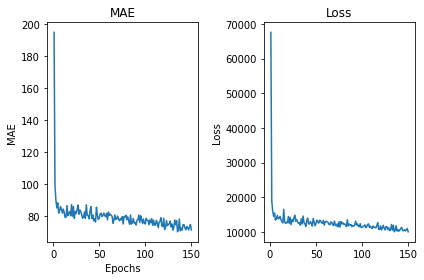

In [184]:
x = range(1, len(mae) + 1)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, mae)
ax1.set_title('MAE')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("MAE")
ax2.plot(x, loss)
ax2.set_title("Loss")
ax2.set_ylabel("Loss")

f.tight_layout()
plt.show()

In [185]:
predictions = model.predict(X_test)

In [186]:
predictions[4]

array([374.9507], dtype=float32)

In [187]:
y_test[4]

array([425.])

<AxesSubplot:>

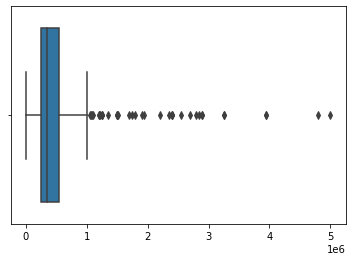

In [172]:
sns.boxplot(x=houses[['Price']])

In [173]:
index_names = houses[houses['Price'] == 0].index
houses.drop(index_names, inplace = True)

<AxesSubplot:>

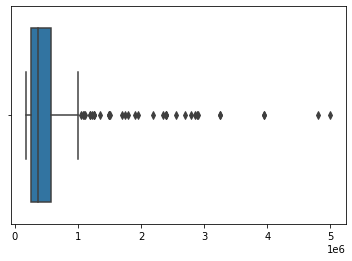

In [174]:
sns.boxplot(x=houses[['Price']])

In [175]:
index_names = houses[houses['Price'] > 1000000].index
houses.drop(index_names, inplace = True)

<AxesSubplot:>

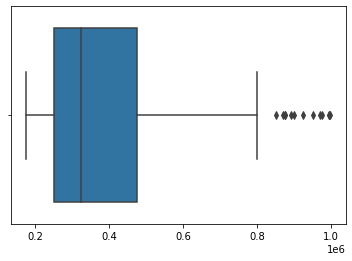

In [176]:
sns.boxplot(x=houses[['Price']])

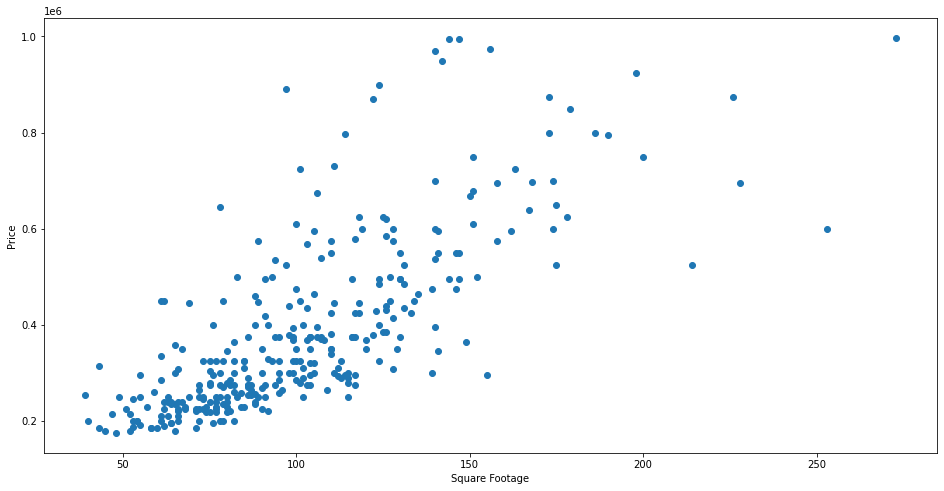

In [191]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(houses['SquareFootage'], houses['Price'])
ax.set_ylabel('Price')
ax.set_xlabel('Square Footage')
plt.show()

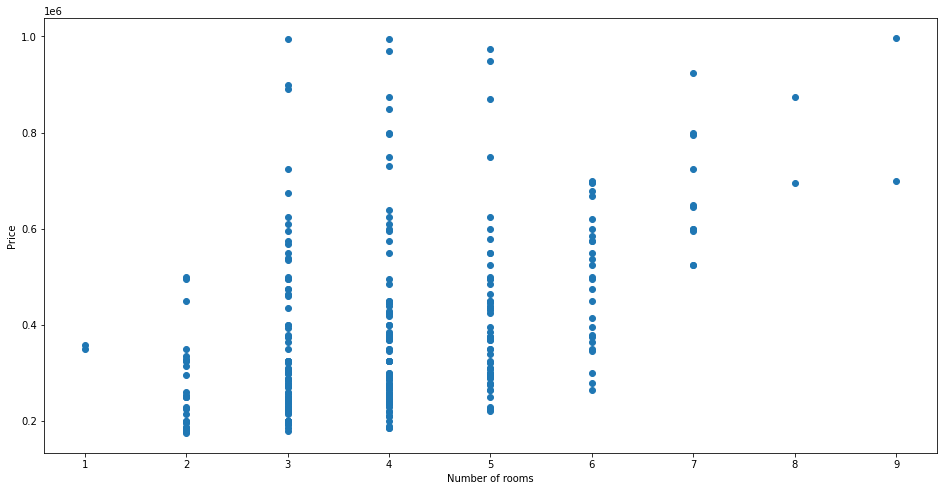

In [192]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(houses['NumberOfRooms'], houses['Price'])
ax.set_ylabel('Price')
ax.set_xlabel('Number of rooms')
plt.show()

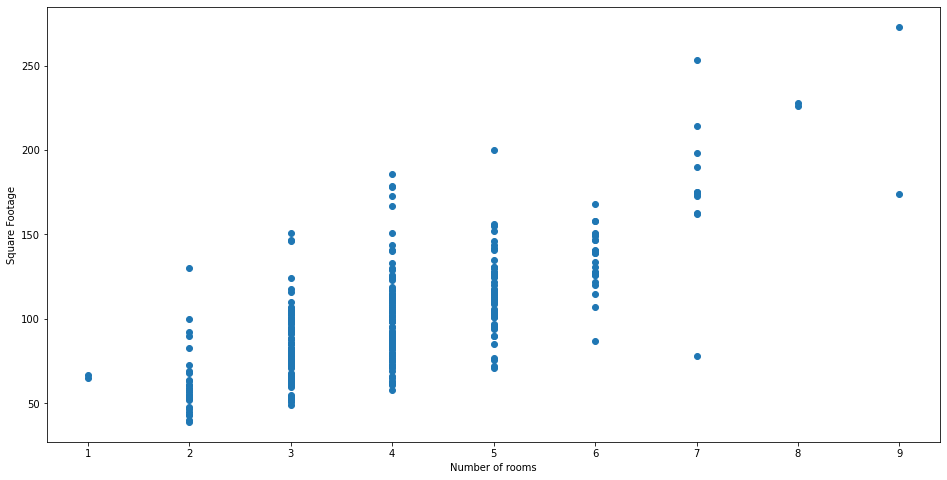

In [193]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(houses['NumberOfRooms'], houses['SquareFootage'])
ax.set_ylabel('Square Footage')
ax.set_xlabel('Number of rooms')
plt.show()